In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import os


In [31]:
file_name = '/Users/kylewong/Downloads/walmart-recruiting-store-sales-forecasting'
os.listdir(file_name)

['features.csv.zip',
 'sampleSubmission.csv.zip',
 'test.csv.zip',
 'train.csv.zip',
 'stores.csv']

In [32]:
features = pd.read_csv(file_name + '/features.csv.zip')
stores = pd.read_csv(file_name + '/stores.csv')
train = pd.read_csv(file_name + '/train.csv.zip')
test = pd.read_csv(file_name + '/test.csv.zip')
sample = pd.read_csv(file_name + '/sampleSubmission.csv.zip')

In [33]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [34]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [35]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [36]:
store_with_features = features.merge(stores, how="inner", on = "Store")

In [37]:
train['data_type'] = 'train'
test['data_type'] = 'test'
data = pd.concat([train, test])

In [38]:
data['Date'] = pd.to_datetime(data['Date'])
store_with_features['Date'] = pd.to_datetime(store_with_features['Date'])

In [39]:
store_with_features['year'], store_with_features['week_in_year'], store_with_features['day_in_week']  = store_with_features['Date'].dt.isocalendar()['year'], store_with_features['Date'].dt.isocalendar()['week'], store_with_features['Date'].dt.isocalendar()['day']
store_with_features['month_in_year'] = store_with_features['Date'].dt.month


In [40]:
store_with_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,year,week_in_year,day_in_week,month_in_year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2010,5,5,2
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,2010,6,5,2
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,2010,7,5,2
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,2010,8,5,2
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,2010,9,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221,2013,26,5,6
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221,2013,27,5,7
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221,2013,28,5,7
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221,2013,29,5,7


In [41]:
data_feature = data.merge(store_with_features, how="inner", on = ["Store", "Date", "IsHoliday"])

In [42]:
data_feature.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'data_type',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'year',
       'week_in_year', 'day_in_week', 'month_in_year'],
      dtype='object')

In [43]:
data_feature_weekly = data_feature.groupby(['Store', 'Dept', 'Date', 'IsHoliday', 'data_type',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'year',
       'week_in_year', 'day_in_week', 'month_in_year'])['Weekly_Sales'].sum().reset_index()

In [44]:
data_feature_weekly['Type'] = data_feature_weekly['Type'].map({'A': 1, 'B': 2, 'C': 3})
data_feature_weekly['IsHoliday'] = data_feature_weekly['IsHoliday'].map({True: 1, False: 0})

In [87]:
data_feature_weekly.to_excel('homework.xlsx')

In [47]:
train_data = data_feature_weekly[data_feature_weekly['data_type'] == 'train'].copy()
test_data = data_feature_weekly[data_feature_weekly['data_type'] == 'test'].copy()

/var/folders/0b/ck588rqj4fb605kb4f66vr9r0000gn/T/ipykernel_1424/2338214434.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



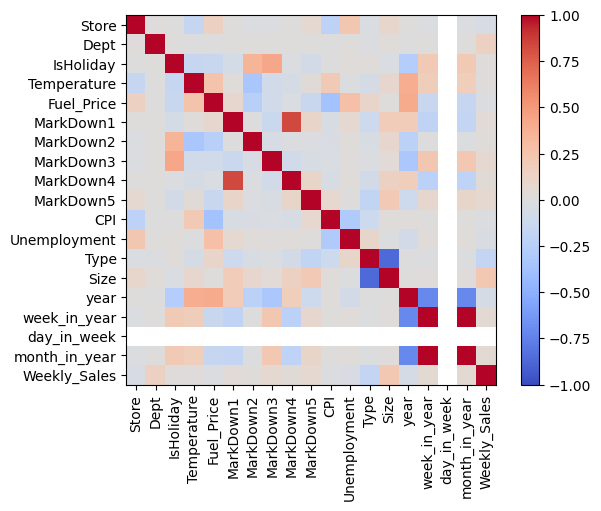

In [48]:
train_cor = train_data.corr()
fig, ax = plt.subplots()

# Create the heatmap using matplotlib
heatmap = ax.imshow(train_cor, cmap='coolwarm', vmin=-1, vmax=1)

# Add a colorbar
cbar = fig.colorbar(heatmap)

# Set the tick labels
ax.set_xticks(range(len(train_cor.columns)))
ax.set_yticks(range(len(train_cor.columns)))
ax.set_xticklabels(train_cor.columns, rotation=90)
ax.set_yticklabels(train_cor.columns)

# Show the plot
plt.show()


In [78]:
# Calculate the absolute correlation values
abs_corr = train_cor.abs()
# Extract the top n features based on absolute correlation
top_features = abs_corr.nlargest(6, 'Weekly_Sales')['Weekly_Sales'].index
# Print the top n features
print(top_features)

Index(['Weekly_Sales', 'Size', 'Type', 'Dept', 'MarkDown3', 'MarkDown5'], dtype='object')


In [79]:
features = ['Size', 'Type', 'Dept', 'MarkDown3', 'MarkDown5']
train_data[features]

,Size,Type,Dept,MarkDown3,MarkDown5
0,151315,1,1,215.07,6551.42
1,151315,1,1,51.98,5988.57
2,151315,1,1,55805.51,554.92
3,151315,1,1,1398.11,20475.32
4,151315,1,1,105.02,14461.82
...,...,...,...,...,...
143525,118221,2,98,92.93,3992.13
143526,118221,2,98,52.63,2055.70
143527,118221,2,98,63.24,8670.40
143528,118221,2,98,1.50,3288.25


In [88]:
X = train_data[features].copy()
y = train_data['Weekly_Sales'].copy()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=555, test_size=0.2)

In [94]:
LR = LinearRegression()
LR.fit(X_train, y_train)
preds = LR.predict(X_valid)
rmse = mean_squared_error(y_valid, preds, squared=False)
print(rmse)

24357.816773671082


In [95]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
preds = RF.predict(X_valid)
rmse = mean_squared_error(y_valid, preds, squared=False)
print(rmse)


6246.255231146499


In [92]:
random_forest_model = RandomForestRegressor(random_state=5648)
random_forest_model.fit(X, y)
test_x = X_valid[features].copy()
test_y = y_valid
y_pred = random_forest_model.predict(test_x)

rmse = np.sqrt(mean_squared_error(test_y , y_pred))
print("RMSE:", rmse)

        True Values  Predicted Values
113411       231.26          237.4807
69778      24218.55        23505.2774
95651       7130.58         6835.4885
9918        1278.41         1100.2990
85983       2469.10         2450.9813
...             ...               ...
133254      1585.07         1969.4695
40362       4608.06         4692.1899
135101     34209.28        34607.2013
4094       36981.11        36600.3685
30984       4972.96         5783.7824

[19412 rows x 2 columns]
RMSE: 2302.3776215887024


In [93]:
#Normalize rmse with max-min
rmse / (test_y.max()-test_y.min())

0.005865616118058346